In [321]:
import pandas as pd
import io
df = pd.read_csv('gun-violence-data_01-2013_03-2018 (1).csv')


In [322]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [323]:
df.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [324]:
df['date'] = pd.to_datetime(df['date'])

In [454]:
#Filtering by year 2017, and adding column for total victims

df_2017 = df[(df['date'] >= '2017-1-1')]
df_2017 = df_2017[(df_2017['date'] < '2018-1-1')]
df_2017['victims'] = df_2017['n_killed'] + df_2017['n_injured']

In [484]:
# Filtering by year 2016, 2015, and 2014

df_2016 = df[(df['date'] >= '2016-1-1')]
df_2016 = df_2016[(df_2016['date'] < '2017-1-1')]
df_2016['victims'] = df_2016['n_killed'] + df_2016['n_injured']

df_2015 = df[(df['date'] >= '2015-1-1')]
df_2015 = df_2015[(df_2015['date'] < '2016-1-1')]
df_2015['victims'] = df_2015['n_killed'] + df_2015['n_injured']

df_2014 = df[(df['date'] >= '2014-1-1')]
df_2014 = df_2014[(df_2014['date'] < '2015-1-1')]
df_2014['victims'] = df_2014['n_killed'] + df_2014['n_injured']

In [522]:
# Chicago alone
df_2014_ILz = df_2014_IL[(df_2014_IL['city_or_county'] == 'Chicago')]
df_2015_ILz = df_2015_IL[(df_2015_IL['city_or_county'] == 'Chicago')]
df_2016_ILz = df_2016_IL[(df_2016_IL['city_or_county'] == 'Chicago')]
df_2017_ILz = df_2017_IL[(df_2017_IL['city_or_county'] == 'Chicago')]


In [536]:
# Making a df for each state in 2017, and getting sum of total victims for the year

df_2017_AL = df_2017[(df_2017['state'] == 'Alabama')]
AL_v = df_2017_AL['victims'].sum()
AL_k = df_2017_AL['n_killed'].sum()
AL_i = df_2017_AL['n_injured'].sum()

df_2017_AK = df_2017[(df_2017['state'] == 'Alaska')]
AK_v = df_2017_AK['victims'].sum()
AK_k = df_2017_AK['n_killed'].sum()
AK_i = df_2017_AK['n_injured'].sum()

df_2017_AZ = df_2017[(df_2017['state'] == 'Arizona')]
AZ_v = df_2017_AZ['victims'].sum()
AZ_k = df_2017_AZ['n_killed'].sum()
AZ_i = df_2017_AZ['n_injured'].sum()

df_2017_AR = df_2017[(df_2017['state'] == 'Arkansas')]
AR_v = df_2017_AR['victims'].sum()
AR_k = df_2017_AR['n_killed'].sum()
AR_i = df_2017_AR['n_injured'].sum()

df_2017_CA = df_2017[(df_2017['state'] == 'California')]
CA_v = df_2017_CA['victims'].sum()
CA_k = df_2017_CA['n_killed'].sum()
CA_i = df_2017_CA['n_injured'].sum()

df_2017_CO = df_2017[(df_2017['state'] == 'Colorado')]
CO_v = df_2017_CO['victims'].sum()
CO_k = df_2017_CO['n_killed'].sum()
CO_i = df_2017_CO['n_injured'].sum()

df_2017_CT = df_2017[(df_2017['state'] == 'Connecticut')]
CT_v = df_2017_CT['victims'].sum()
CT_k = df_2017_CT['n_killed'].sum()
CT_i = df_2017_CT['n_injured'].sum()

df_2017_DE = df_2017[(df_2017['state'] == 'Delaware')]
DE_v = df_2017_DE['victims'].sum()
DE_k = df_2017_DE['n_killed'].sum()
DE_i = df_2017_DE['n_injured'].sum()

df_2017_FL = df_2017[(df_2017['state'] == 'Florida')]
FL_v = df_2017_FL['victims'].sum()
FL_k = df_2017_FL['n_killed'].sum()
FL_i = df_2017_FL['n_injured'].sum()

df_2017_GA = df_2017[(df_2017['state'] == 'Georgia')]
GA_v = df_2017_GA['victims'].sum()
GA_k = df_2017_GA['n_killed'].sum()
GA_i = df_2017_GA['n_injured'].sum()

df_2017_HI = df_2017[(df_2017['state'] == 'Hawaii')]
HI_v = df_2017_HI['victims'].sum()
HI_k = df_2017_HI['n_killed'].sum()
HI_i = df_2017_HI['n_injured'].sum()

df_2017_ID = df_2017[(df_2017['state'] == 'Idaho')]
ID_v = df_2017_ID['victims'].sum()
ID_k = df_2017_ID['n_killed'].sum()
ID_i = df_2017_ID['n_injured'].sum()

df_2017_IL = df_2017[(df_2017['state'] == 'Illinois')]
IL_v = df_2017_IL['victims'].sum()
IL_k = df_2017_IL['n_killed'].sum()
IL_i = df_2017_IL['n_injured'].sum()

df_2017_IN = df_2017[(df_2017['state'] == 'Indiana')]
IN_v = df_2017_IN['victims'].sum()
IN_k = df_2017_IN['n_killed'].sum()
IN_i = df_2017_IN['n_injured'].sum()

df_2017_IA = df_2017[(df_2017['state'] == 'Iowa')]
IA_v = df_2017_IA['victims'].sum()
IA_k = df_2017_IA['n_killed'].sum()
IA_i = df_2017_IA['n_injured'].sum()

df_2017_KS = df_2017[(df_2017['state'] == 'Kansas')]
KS_v = df_2017_KS['victims'].sum()
KS_k = df_2017_KS['n_killed'].sum()
KS_i = df_2017_KS['n_injured'].sum()

df_2017_KY = df_2017[(df_2017['state'] == 'Kentucky')]
KY_v = df_2017_KY['victims'].sum()
KY_k = df_2017_KY['n_killed'].sum()
KY_i = df_2017_KY['n_injured'].sum()

df_2017_LA = df_2017[(df_2017['state'] == 'Louisiana')]
LA_v = df_2017_LA['victims'].sum()
LA_k = df_2017_LA['n_killed'].sum()
LA_i = df_2017_LA['n_injured'].sum()

df_2017_ME = df_2017[(df_2017['state'] == 'Maine')]
ME_v = df_2017_ME['victims'].sum()
ME_k = df_2017_ME['n_killed'].sum()
ME_i = df_2017_ME['n_injured'].sum()

df_2017_MD = df_2017[(df_2017['state'] == 'Maryland')]
MD_v = df_2017_MD['victims'].sum()
MD_k = df_2017_MD['n_killed'].sum()
MD_i = df_2017_MD['n_injured'].sum()

df_2017_MA = df_2017[(df_2017['state'] == 'Massachusetts')]
MA_v = df_2017_MA['victims'].sum()
MA_k = df_2017_MA['n_killed'].sum()
MA_i = df_2017_MA['n_injured'].sum()

df_2017_MI = df_2017[(df_2017['state'] == 'Michigan')]
MI_v = df_2017_MI['victims'].sum()
MI_k = df_2017_MI['n_killed'].sum()
MI_i = df_2017_MI['n_injured'].sum()

df_2017_MN = df_2017[(df_2017['state'] == 'Minnesota')]
MN_v = df_2017_MN['victims'].sum()
MN_k = df_2017_MN['n_killed'].sum()
MN_i = df_2017_MN['n_injured'].sum()

df_2017_MS = df_2017[(df_2017['state'] == 'Mississippi')]
MS_v = df_2017_MS['victims'].sum()
MS_k = df_2017_MS['n_killed'].sum()
MS_i = df_2017_MS['n_injured'].sum()

df_2017_MO = df_2017[(df_2017['state'] == 'Missouri')]
MO_v = df_2017_MO['victims'].sum()
MO_k = df_2017_MO['n_killed'].sum()
MO_i = df_2017_MO['n_injured'].sum()

df_2017_MT = df_2017[(df_2017['state'] == 'Montana')]
MT_v = df_2017_MT['victims'].sum()
MT_k = df_2017_MT['n_killed'].sum()
MT_i = df_2017_MT['n_injured'].sum()

df_2017_NE = df_2017[(df_2017['state'] == 'Nebraska')]
NE_v = df_2017_NE['victims'].sum()
NE_k = df_2017_NE['n_killed'].sum()
NE_i = df_2017_NE['n_injured'].sum()

df_2017_NV = df_2017[(df_2017['state'] == 'Nevada')]
NV_v = df_2017_NV['victims'].sum()
NV_k = df_2017_NV['n_killed'].sum()
NV_i = df_2017_NV['n_injured'].sum()

df_2017_NH = df_2017[(df_2017['state'] == 'New Hampshire')]
NH_v = df_2017_NH['victims'].sum()
NH_k = df_2017_NH['n_killed'].sum()
NH_i = df_2017_NH['n_injured'].sum()

df_2017_NJ = df_2017[(df_2017['state'] == 'New Jersey')]
NJ_v = df_2017_NJ['victims'].sum()
NJ_k = df_2017_NJ['n_killed'].sum()
NJ_i = df_2017_NJ['n_injured'].sum()

df_2017_NM = df_2017[(df_2017['state'] == 'New Mexico')]
NM_v = df_2017_NM['victims'].sum()
NM_k = df_2017_NM['n_killed'].sum()
NM_i = df_2017_NM['n_injured'].sum()

df_2017_NY = df_2017[(df_2017['state'] == 'New York')]
NY_v = df_2017_NY['victims'].sum()
NY_k = df_2017_NY['n_killed'].sum()
NY_i = df_2017_NY['n_injured'].sum()

df_2017_NC = df_2017[(df_2017['state'] == 'North Carolina')]
NC_v = df_2017_NC['victims'].sum()
NC_k = df_2017_NC['n_killed'].sum()
NC_i = df_2017_NC['n_injured'].sum()

df_2017_ND = df_2017[(df_2017['state'] == 'North Dakota')]
ND_v = df_2017_ND['victims'].sum()
ND_k = df_2017_ND['n_killed'].sum()
ND_i = df_2017_ND['n_injured'].sum()

df_2017_OH = df_2017[(df_2017['state'] == 'Ohio')]
OH_v = df_2017_OH['victims'].sum()
OH_k = df_2017_OH['n_killed'].sum()
OH_i = df_2017_OH['n_injured'].sum()

df_2017_OK = df_2017[(df_2017['state'] == 'Oklahoma')]
OK_v = df_2017_OK['victims'].sum()
OK_k = df_2017_OK['n_killed'].sum()
OK_i = df_2017_OK['n_injured'].sum()

df_2017_OR = df_2017[(df_2017['state'] == 'Oregon')]
OR_v = df_2017_OR['victims'].sum()
OR_k = df_2017_OR['n_killed'].sum()
OR_i = df_2017_OR['n_injured'].sum()

df_2017_PA = df_2017[(df_2017['state'] == 'Pennsylvania')]
PA_v = df_2017_PA['victims'].sum()
PA_k = df_2017_PA['n_killed'].sum()
PA_i = df_2017_PA['n_injured'].sum()

df_2017_RI = df_2017[(df_2017['state'] == 'Rhode Island')]
RI_v = df_2017_RI['victims'].sum()
RI_k = df_2017_RI['n_killed'].sum()
RI_i = df_2017_RI['n_injured'].sum()

df_2017_SC = df_2017[(df_2017['state'] == 'South Carolina')]
SC_v = df_2017_SC['victims'].sum()
SC_k = df_2017_SC['n_killed'].sum()
SC_i = df_2017_SC['n_injured'].sum()

df_2017_SD = df_2017[(df_2017['state'] == 'South Dakota')]
SD_v = df_2017_SD['victims'].sum()
SD_k = df_2017_SD['n_killed'].sum()
SD_i = df_2017_SD['n_injured'].sum()

df_2017_TN = df_2017[(df_2017['state'] == 'Tennessee')]
TN_v = df_2017_TN['victims'].sum()
TN_k = df_2017_TN['n_killed'].sum()
TN_i = df_2017_TN['n_injured'].sum()

df_2017_TX = df_2017[(df_2017['state'] == 'Texas')]
TX_v = df_2017_TX['victims'].sum()
TX_k = df_2017_TX['n_killed'].sum()
TX_i = df_2017_TX['n_injured'].sum()

df_2017_UT = df_2017[(df_2017['state'] == 'Utah')]
UT_v = df_2017_UT['victims'].sum()
UT_k = df_2017_UT['n_killed'].sum()
UT_i = df_2017_UT['n_injured'].sum()

df_2017_VT = df_2017[(df_2017['state'] == 'Vermont')]
VT_v = df_2017_VT['victims'].sum()
VT_k = df_2017_VT['n_killed'].sum()
VT_i = df_2017_VT['n_injured'].sum()

df_2017_VA = df_2017[(df_2017['state'] == 'Virginia')]
VA_v = df_2017_VA['victims'].sum()
VA_k = df_2017_VA['n_killed'].sum()
VA_i = df_2017_VA['n_injured'].sum()

df_2017_WA = df_2017[(df_2017['state'] == 'Washington')]
WA_v = df_2017_WA['victims'].sum()
WA_k = df_2017_WA['n_killed'].sum()
WA_i = df_2017_WA['n_injured'].sum()

df_2017_WV = df_2017[(df_2017['state'] == 'West Virginia')]
WV_v = df_2017_WV['victims'].sum()
WV_k = df_2017_WV['n_killed'].sum()
WV_i = df_2017_WV['n_injured'].sum()

df_2017_WI = df_2017[(df_2017['state'] == 'Wisconsin')]
WI_v = df_2017_WI['victims'].sum()
WI_k = df_2017_WI['n_killed'].sum()
WI_i = df_2017_WI['n_injured'].sum()

df_2017_WY = df_2017[(df_2017['state'] == 'Wyoming')]
WY_v = df_2017_WY['victims'].sum()
WY_k = df_2017_WY['n_killed'].sum()
WY_i = df_2017_WY['n_injured'].sum()

df_2017_ILz = df_2017_IL[(df_2017_IL['city_or_county'] == 'Chicago')]
Chi_ILzi = df_2017_ILz['n_injured'].sum()
Chi_ILzk = df_2017_ILz['n_killed'].sum()

print(NY)

1439


In [561]:
# Creating lists of columns for eventual new dataframe for 2014,2015,2016, and 2017

states = ("Alabama","Alaska","Arizona","Arkansas","California","Colorado",
          "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
          "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
          "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
          "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
          "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
          "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
          "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming")

abbrev = ('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT','DE','FL','GA',
          'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
          'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC',
          'ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT',
          'VT','VA','WA','WV','WI','WY')
victims = (AL_v,AK_v,AZ_v,AR_v,CA_v,CO_v,CT_v,DE_v,FL_v,GA_v,HI_v,
          ID_v,IL_v,IN_v,IA_v,KS_v,KY_v,LA_v,ME_v,MD_v,MA_v,MI_v,
          MN_v,MS_v,MO_v,MT_v,NE_v,NV_v,NH_v,NJ_v,NM_v,NY_v,NC_v,
          ND_v,OH_v,OK_v,OR_v,PA_v,RI_v,SC_v,SD_v,TN_v,TX_v,UT_v,
          VT_v,VA_v,WA_v,WV_v,WI_v,WY_v)
killed = (AL_k,AK_k,AZ_k,AR_k,CA_k,CO_k,CT_k,DE_k,FL_k,GA_k,HI_k,
          ID_k,IL_k,IN_k,IA_k,KS_k,KY_k,LA_k,ME_k,MD_k,MA_k,MI_k,
          MN_k,MS_k,MO_k,MT_k,NE_k,NV_k,NH_k,NJ_k,NM_k,NY_k,NC_k,
          ND_k,OH_k,OK_k,OR_k,PA_k,RI_k,SC_k,SD_k,TN_k,TX_k,UT_k,
          VT_k,VA_k,WA_k,WV_k,WI_k,WY_k)
injured =(AL_i,AK_i,AZ_i,AR_i,CA_i,CO_i,CT_i,DE_i,FL_i,GA_i,HI_i,
          ID_i,IL_i,IN_i,IA_i,KS_i,KY_i,LA_i,ME_i,MD_i,MA_i,MI_i,
          MN_i,MS_i,MO_i,MT_i,NE_i,NV_i,NH_i,NJ_i,NM_i,NY_i,NC_i,
          ND_i,OH_i,OK_i,OR_i,PA_i,RI_i,SC_i,SD_i,TN_i,TX_i,UT_i,
          VT_i,VA_i,WA_i,WV_i,WI_i,WY_i)

populations = (4874747, 739395, 7016270, 3004279, 39536653, 5607154, 3588184, 961939, 20984400,
               10429379, 1427538, 1716943, 12802023, 6666818, 3145711, 2913123, 4454189,
               4684333, 1335907, 6052177, 6859819, 9962311, 5576606, 2984100, 6113532, 1050492,
               1920076, 2998039, 1342795, 9005644, 2088070, 19849399, 10273419, 755393, 11658809,
               3930864, 4142776, 12805537, 1059639, 5024369, 869666, 6715984, 28304596, 3101833,
               623657, 8470020, 7405743, 1815857, 5795483, 579315)

final = {'state':states, 'abbrev':abbrev, 'victims':victims, 'killed':killed, 'injured':injured, 'population': populations}
    

In [572]:
# Creating final dataframe and adding column for victims/1k people
df2 = pd.DataFrame(final)

df2['per1k'] = round(df2['victims']/df2['population'] * 100000, 1)


In [573]:
df2.head(50)

,state,abbrev,victims,killed,injured,population,per1k
0,Alabama,AL,1400,544,856,4874747,28.7
1,Alaska,AK,139,69,70,739395,18.8
2,Arizona,AZ,587,289,298,7016270,8.4
3,Arkansas,AR,653,216,437,3004279,21.7
4,California,CA,3376,1423,1953,39536653,8.5
5,Colorado,CO,499,199,300,5607154,8.9
6,Connecticut,CT,382,89,293,3588184,10.6
7,Delaware,DE,297,56,241,961939,30.9
8,Florida,FL,2751,950,1801,20984400,13.1
9,Georgia,GA,1715,658,1057,10429379,16.4


In [574]:
# Plotting choropleth graph offline

import plotly.plotly as py
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py


for col in df2.columns:
    df2[col] = df2[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#df2['text'] = df2['state'] + '<br>' +\
    #'victims '+df2['victims']+'<br>'+'killed '+df2['killed']+'<br>'+\
    #'injured '+df2['injured']

df2['text'] = df2['state'] + '<br>' +\
              'Victims ' + df2['victims'] + '<br>' + 'Population '+df2['population'] + '<br>'+\
              'Victims per 100,000 '+df2['per1k']
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = df2['abbrev'],
        z = df2['per1k'].astype(float),
        locationmode = 'USA-states',
        text = df2['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "")
        ) ]

layout = dict(
        title = 'Shooting victims per 100,000',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.plot( fig, filename='d3-cloropleth-map' )

/Users/joshsolis/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:621: UserWarning:

Your filename `d3-cloropleth-map` didn't end with .html. Adding .html to the end of your file.



'file:///Users/joshsolis/Downloads/d3-cloropleth-map.html'

In [520]:
df2.head()

,state,abbrev,victims,killed,injured
0,Alabama,AL,1400,544,856
1,Alaska,AK,139,69,70
2,Arizona,AZ,587,289,298
3,Arkansas,AR,653,216,437
4,California,CA,3376,1423,1953


In [521]:
df2.dtypes

state      object
abbrev     object
victims     int64
killed      int64
injured     int64
dtype: object

In [537]:
# Top 6 states and Chicago in 2014
df_2014_IL = df_2014[(df_2014['state'] == 'Illinois')]
IL_v14 = df_2014_IL['victims'].sum()
IL_k14 = df_2014_IL['n_killed'].sum()
IL_i14 = df_2014_IL['n_injured'].sum()

df_2014_CA = df_2014[(df_2014['state'] == 'California')]
CA_v14 = df_2014_CA['victims'].sum()
CA_k14 = df_2014_CA['n_killed'].sum()
CA_i14 = df_2014_CA['n_injured'].sum()

df_2014_TX = df_2014[(df_2014['state'] == 'Texas')]
TX_v14 = df_2014_TX['victims'].sum()
TX_k14 = df_2014_TX['n_killed'].sum()
TX_i14 = df_2014_TX['n_injured'].sum()

df_2014_FL = df_2014[(df_2014['state'] == 'Florida')]
FL_v14 = df_2014_FL['victims'].sum()
FL_k14 = df_2014_FL['n_killed'].sum()
FL_i14 = df_2014_FL['n_injured'].sum()

df_2014_NY = df_2014[(df_2014['state'] == 'New York')]
NY_v14 = df_2014_NY['victims'].sum()
NY_k14 = df_2014_NY['n_killed'].sum()
NY_i14 = df_2014_NY['n_injured'].sum()

df_2014_OH = df_2014[(df_2014['state'] == 'Ohio')]
OH_v14 = df_2014_OH['victims'].sum()
OH_k14 = df_2014_OH['n_killed'].sum()
OH_i14 = df_2014_OH['n_injured'].sum()

df_2014_ILz = df_2014_IL[(df_2014_IL['city_or_county'] == 'Chicago')]
Chi_ILzi14 = df_2014_ILz['n_injured'].sum()
Chi_ILzi14 = df_2014_ILz['n_killed'].sum()


In [538]:
# Top 6 states and Chicago in 2015
df_2015_IL = df_2015[(df_2015['state'] == 'Illinois')]
IL_v15 = df_2015_IL['victims'].sum()
IL_k15 = df_2015_IL['n_killed'].sum()
IL_i15 = df_2015_IL['n_injured'].sum()

df_2015_CA = df_2015[(df_2015['state'] == 'California')]
CA_v15 = df_2015_CA['victims'].sum()
CA_k15 = df_2015_CA['n_killed'].sum()
CA_i15 = df_2015_CA['n_injured'].sum()

df_2015_TX = df_2015[(df_2015['state'] == 'Texas')]
TX_v15 = df_2015_TX['victims'].sum()
TX_k15 = df_2015_TX['n_killed'].sum()
TX_i15 = df_2015_TX['n_injured'].sum()

df_2015_FL = df_2015[(df_2015['state'] == 'Florida')]
FL_v15 = df_2015_FL['victims'].sum()
FL_k15 = df_2015_FL['n_killed'].sum()
FL_i15 = df_2015_FL['n_injured'].sum()

df_2015_NY = df_2015[(df_2015['state'] == 'New York')]
NY_v15 = df_2015_NY['victims'].sum()
NY_k15 = df_2015_NY['n_killed'].sum()
NY_i15 = df_2015_NY['n_injured'].sum()

df_2015_OH = df_2015[(df_2015['state'] == 'Ohio')]
OH_v15 = df_2015_OH['victims'].sum()
OH_k15 = df_2015_OH['n_killed'].sum()
OH_i15 = df_2015_OH['n_injured'].sum()

df_2015_ILz = df_2015_IL[(df_2015_IL['city_or_county'] == 'Chicago')]
Chi_ILzi15 = df_2015_ILz['n_injured'].sum()
Chi_ILzk15 = df_2015_ILz['n_killed'].sum()


In [539]:
# Top 6 states and Chicago in 2016
df_2016_IL = df_2016[(df_2016['state'] == 'Illinois')]
IL_v16 = df_2016_IL['victims'].sum()
IL_k16 = df_2016_IL['n_killed'].sum()
IL_i16 = df_2016_IL['n_injured'].sum()

df_2016_CA = df_2016[(df_2016['state'] == 'California')]
CA_v16 = df_2016_CA['victims'].sum()
CA_k16 = df_2016_CA['n_killed'].sum()
CA_i16 = df_2016_CA['n_injured'].sum()

df_2016_TX = df_2016[(df_2016['state'] == 'Texas')]
TX_v16 = df_2016_TX['victims'].sum()
TX_k16 = df_2016_TX['n_killed'].sum()
TX_i16 = df_2016_TX['n_injured'].sum()

df_2016_FL = df_2016[(df_2016['state'] == 'Florida')]
FL_v16 = df_2016_FL['victims'].sum()
FL_k16 = df_2016_FL['n_killed'].sum()
FL_i16 = df_2016_FL['n_injured'].sum()

df_2016_NY = df_2016[(df_2016['state'] == 'New York')]
NY_v16 = df_2016_NY['victims'].sum()
NY_k16 = df_2016_NY['n_killed'].sum()
NY_i16 = df_2016_NY['n_injured'].sum()

df_2016_OH = df_2016[(df_2016['state'] == 'Ohio')]
OH_v16 = df_2016_OH['victims'].sum()
OH_k16 = df_2016_OH['n_killed'].sum()
OH_i16 = df_2016_OH['n_injured'].sum()

df_2016_ILz = df_2016_IL[(df_2016_IL['city_or_county'] == 'Chicago')]
Chi_ILzi16 = df_2016_ILz['n_injured'].sum()
Chi_ILzk16 = df_2016_ILz['n_killed'].sum()


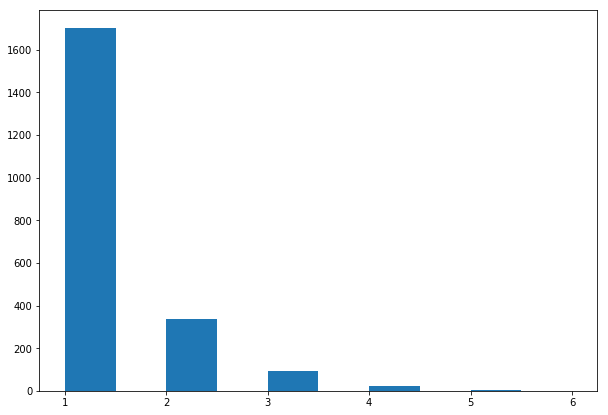

In [540]:
import matplotlib.pyplot as plt
plt.hist(df_2015_CA['victims'], range = [1,6]);
#lt.xticks(range(1,7))

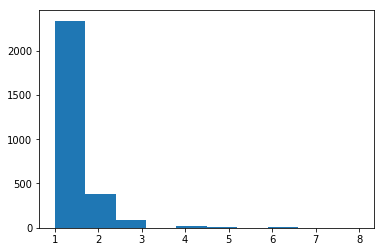

In [467]:
plt.hist(df_2015_IL['victims'], range = [1,8]);



In [510]:
print(df_2014_ILz['victims'].sum())

2307


In [548]:
# Making arrays and combining to make a new top6 dataframe including years 2014,2015,2016, and 2017

top6states = ['IL', 'CA', 'TX', 'FL', 'NY', 'OH','Chicago',
              'IL', 'CA', 'TX', 'FL', 'NY', 'OH','Chicago',
              'IL', 'CA', 'TX', 'FL', 'NY', 'OH','Chicago',
              'IL', 'CA', 'TX', 'FL', 'NY', 'OH','Chicago']

top6injured = [IL_i14, CA_i14, TX_i14, FL_i14, NY_i14, OH_i14, Chi_ILzi14,
               IL_i15, CA_i15, TX_i15, FL_i15, NY_i15, OH_i15, Chi_ILzi15,
               IL_i16, CA_i16, TX_i16, FL_i16, NY_i16, OH_i16, Chi_ILzi16,
               IL_i, CA_i, TX_i, FL_i, NY_i, OH_i, Chi_ILzi]

top6killed = [IL_k14, CA_k14, TX_k14, FL_k14, NY_k14, OH_k14, Chi_ILzk14,
              IL_k15, CA_k15, TX_k15, FL_k15, NY_k15, OH_k15, Chi_ILzk15,
              IL_k16, CA_k16, TX_k16, FL_k16, NY_k16, OH_k16, Chi_ILzk16,
              IL_k, CA_k, TX_k, FL_k, NY_k, OH_k, Chi_ILzk]

top6 = {'states':top6states, 'injured':top6injured, 'killed':top6killed}

df_top6 = pd.DataFrame(top6)

# Renaming rows to be years

df_top6.rename({0:2014,1:2014,2:2014,3:2014,4:2014,5:2014,
               6:2014,7:2015,8:2015,9:2015,10:2015,11:2015,
               12:2015,13:2015,14:2016,15:2016,16:2016,17:2016,
               18:2016,19:2016,20:2016,21:2017,22:2017,23:2017,
               24:2017,25:2017,26:2017,27:2017}, inplace=True)

df_top6.head()

,states,injured,killed
2014,IL,2276,637
2014,CA,1607,1320
2014,TX,1157,1094
2014,FL,1463,873
2014,NY,965,397


In [549]:
# Adding total victims column to df_top6 dataframe

df_top6['total victims'] = df_top6['injured'] + df_top6['killed']

In [575]:
df_top6

,states,injured,killed,total victims
2014,IL,2276,637,2913
2014,CA,1607,1320,2927
2014,TX,1157,1094,2251
2014,FL,1463,873,2336
2014,NY,965,397,1362
2014,OH,1120,494,1614
2014,Chicago,414,414,828
2015,IL,2822,688,3510
2015,CA,1617,1204,2821
2015,TX,1355,1136,2491


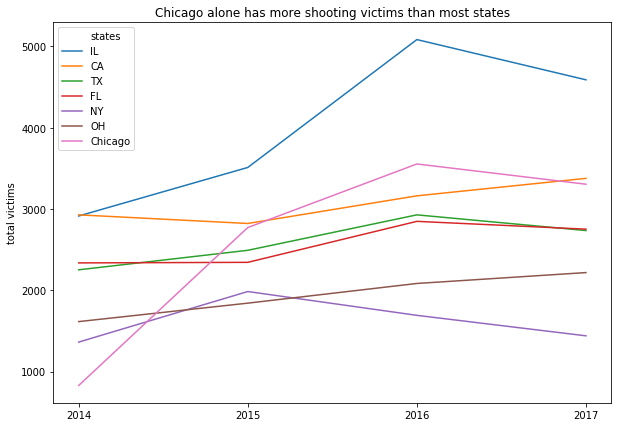

In [552]:
import seaborn as sns
plt.rcParams['figure.figsize']=(10,7)
sns.lineplot(df_top6.index, df_top6['total victims'], hue = df_top6['states']);
plt.title("Chicago alone has more shooting victims than most states");
plt.xticks((2014, 2015, 2016, 2017));